In [33]:
import sqlalchemy as sql
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
engine = sql.create_engine('sqlite:///IT_Wynagrodzenia', echo = True)

In [3]:
with engine.connect() as connection:
    result = connection.execute(sql.text("SELECT * FROM IT_praca_wynagrodzenie"))

2025-01-12 22:21:37,371 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-12 22:21:37,374 INFO sqlalchemy.engine.Engine SELECT * FROM IT_praca_wynagrodzenie
2025-01-12 22:21:37,375 INFO sqlalchemy.engine.Engine [generated in 0.00399s] ()
2025-01-12 22:21:37,377 INFO sqlalchemy.engine.Engine ROLLBACK


In [4]:
df = pd.DataFrame(result)
df

,Nazwa,Technologia,Doświadczenie,Lokalizacja,Wypłata
0,Trainee Java Developer,Java,trainee,warszawa,bezpłatnystaż\n
1,Junior Java Fullstack Developer,Java,junior,warszawa,8500–10500
2,Junior Java Developer,Java,junior,warszawa,10080
3,Jr. Java Trading Systems Developer (Core Java),Java,junior,warszawa,6500–9000
4,Full-stack Junior/middle (React/Node.js/Java)...,Java,junior,warszawa,Sprawdźzarobki
...,...,...,...,...,...
2609,Senior Full-stack Developer (Angular/C++),HTML,expert,krakow,18000–23000
2610,Remote Lead Software Engineer (.NET),HTML,expert,gdansk,20000–25000
2611,Remote Lead Software Engineer (.NET),HTML,expert,trojmiasto,20000–25000
2612,Remote Lead Software Engineer (.NET),HTML,expert,bialystok,20000–25000


In [5]:
df = df.loc[~df['Wypłata'].isin(['bezpłatnystaż\n','Sprawdźzarobki','SprawdźSalaryMatch'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2117 entries, 1 to 2613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nazwa          2117 non-null   object
 1   Technologia    2117 non-null   object
 2   Doświadczenie  2117 non-null   object
 3   Lokalizacja    2117 non-null   object
 4   Wypłata        2117 non-null   object
dtypes: object(5)
memory usage: 99.2+ KB


In [7]:
df['Technologia'] = df['Technologia'].replace('C%2B%2B','C++')
df['Technologia'] = df['Technologia'].replace('C%23','C#')

C:\Users\ja\AppData\Local\Temp\ipykernel_2792\2484636410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Technologia'] = df ['Technologia'].replace('C%2B%2B','C++')
C:\Users\ja\AppData\Local\Temp\ipykernel_2792\2484636410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Technologia'] = df ['Technologia'].replace('C%23','C#')


In [8]:
dol_przedzialu_wyplaty = []
gora_przedzialu_wyplaty = []
for i in df['Wypłata']:
    x = i.split('–')
    if len(x) == 2:
        dol_przedzialu_wyplaty.append(int(x[0]))
        gora_przedzialu_wyplaty.append(int(x[1]))
    elif len(x) == 1:
        dol_przedzialu_wyplaty.append(int(x[0]))
        gora_przedzialu_wyplaty.append(int(x[0]))
df['minimalna_pensja'] = dol_przedzialu_wyplaty
df['maksymalna_pensja'] = gora_przedzialu_wyplaty

C:\Users\ja\AppData\Local\Temp\ipykernel_2792\3157492897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minimalna_pensja'] = dol_przedzialu_wyplaty
C:\Users\ja\AppData\Local\Temp\ipykernel_2792\3157492897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maksymalna_pensja'] = gora_przedzialu_wyplaty


In [9]:
srednia_wyplata = []
for i in df['Wypłata']:
    x = i.split('–')
    if len(x) == 2:
        srednia = (int(x[0]) + int(x[1]))/2
        srednia_wyplata.append(srednia)
    elif len(x) == 1:
        srednia_wyplata.append(int(x[0]))
        
df['Średnia_wyplata'] = srednia_wyplata

C:\Users\ja\AppData\Local\Temp\ipykernel_2792\1593488520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Średnia_wyplata'] = srednia_wyplata


In [10]:
df

,Nazwa,Technologia,Doświadczenie,Lokalizacja,Wypłata,minimalna_pensja,maksymalna_pensja,Średnia_wyplata
1,Junior Java Fullstack Developer,Java,junior,warszawa,8500–10500,8500,10500,9500.0
2,Junior Java Developer,Java,junior,warszawa,10080,10080,10080,10080.0
3,Jr. Java Trading Systems Developer (Core Java),Java,junior,warszawa,6500–9000,6500,9000,7750.0
5,Associate Java Software Engineer,Java,junior,krakow,7000–10000,7000,10000,8500.0
6,Jr. Java Trading Systems Developer (Core Java),Java,junior,krakow,6500–9000,6500,9000,7750.0
...,...,...,...,...,...,...,...,...
2609,Senior Full-stack Developer (Angular/C++),HTML,expert,krakow,18000–23000,18000,23000,20500.0
2610,Remote Lead Software Engineer (.NET),HTML,expert,gdansk,20000–25000,20000,25000,22500.0
2611,Remote Lead Software Engineer (.NET),HTML,expert,trojmiasto,20000–25000,20000,25000,22500.0
2612,Remote Lead Software Engineer (.NET),HTML,expert,bialystok,20000–25000,20000,25000,22500.0


In [11]:
conn = db.connect('IT_Wynagrodzenia_oczyszczone')
df.to_sql('IT_praca_wynagrodzenie', conn, if_exists='replace', index=False)

2117

In [12]:
conn.close()

In [13]:
engine = sql.create_engine('sqlite:///IT_Wynagrodzenia_oczyszczone', echo = True)

In [14]:
with engine.connect() as connection:
    result = connection.execute(sql.text("SELECT * FROM IT_praca_wynagrodzenie"))

2025-01-12 22:21:37,819 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-12 22:21:37,821 INFO sqlalchemy.engine.Engine SELECT * FROM IT_praca_wynagrodzenie
2025-01-12 22:21:37,822 INFO sqlalchemy.engine.Engine [generated in 0.00340s] ()
2025-01-12 22:21:37,825 INFO sqlalchemy.engine.Engine ROLLBACK


In [15]:
df = pd.DataFrame(result)
df

,Nazwa,Technologia,Doświadczenie,Lokalizacja,Wypłata,minimalna_pensja,maksymalna_pensja,Średnia_wyplata
0,Junior Java Fullstack Developer,Java,junior,warszawa,8500–10500,8500,10500,9500.0
1,Junior Java Developer,Java,junior,warszawa,10080,10080,10080,10080.0
2,Jr. Java Trading Systems Developer (Core Java),Java,junior,warszawa,6500–9000,6500,9000,7750.0
3,Associate Java Software Engineer,Java,junior,krakow,7000–10000,7000,10000,8500.0
4,Jr. Java Trading Systems Developer (Core Java),Java,junior,krakow,6500–9000,6500,9000,7750.0
...,...,...,...,...,...,...,...,...
2112,Senior Full-stack Developer (Angular/C++),HTML,expert,krakow,18000–23000,18000,23000,20500.0
2113,Remote Lead Software Engineer (.NET),HTML,expert,gdansk,20000–25000,20000,25000,22500.0
2114,Remote Lead Software Engineer (.NET),HTML,expert,trojmiasto,20000–25000,20000,25000,22500.0
2115,Remote Lead Software Engineer (.NET),HTML,expert,bialystok,20000–25000,20000,25000,22500.0


In [19]:
popularnosc = df.groupby('Technologia')[['minimalna_pensja','maksymalna_pensja','Średnia_wyplata']].agg(['min','max','mean','count'])
popularnosc

minimalna_pensja                            maksymalna_pensja  \
                         min    max          mean count               min   
Technologia                                                                 
Angular                 5000  36120  18080.327586   116              9000   
C#                      5000  27720  17003.639344   122              5500   
C++                     7000  33600  20232.507042    71             10000   
Golang                 12000  28990  21223.806452    31             17000   
HTML                    5000  27000  15384.183206   131              8000   
Java                    5000  33600  20384.290076   262              5800   
JavaScript              5000  36120  17482.329154   319              5500   
Python                   175  35000  21461.096346   301               195   
React                   5000  33000  18228.656627   166              5500   
SQL                     5000  36120  18981.502618   382              5800   
TypeScript              5000  36120  17981.523148   216              5500   

                                       Średnia_wyplata                         \
               max          mean count             min      max          mean   
Technologia                                                                     
Angular      36180  23167.534483   116          7000.0  36120.0  20623.931034   
C#           33600  21719.852459   122          5250.0  30300.0  19361.745902   
C++          43680  24467.211268    71          8500.0  38640.0  22349.859155   
Golang       35000  27414.193548    31         14500.0  31500.0  24319.000000   
HTML         33600  20384.206107   131          7000.0  30300.0  17884.194656   
Java         43680  25077.637405   262          5400.0  38640.0  22730.963740   
JavaScript   53000  22898.288401   319          5250.0  43000.0  20190.308777   
Python       54000  26522.853821   301           185.0  44500.0  23991.975083   
React        53000  23585.662651   166          5250.0  43000.0  20907.159639   
SQL          54000  23613.484293   382          5400.0  44500.0  21297.493455   
TypeScript   53000  23683.717593   216          5250.0  43000.0  20832.620370   

                   
            count  
Technologia        
Angular       116  
C#            122  
C++            71  
Golang         31  
HTML          131  
Java          262  
JavaScript    319  
Python        301  
React         166  
SQL           382  
TypeScript    216

Text(0, 0.5, 'Zarobki w [zł]')

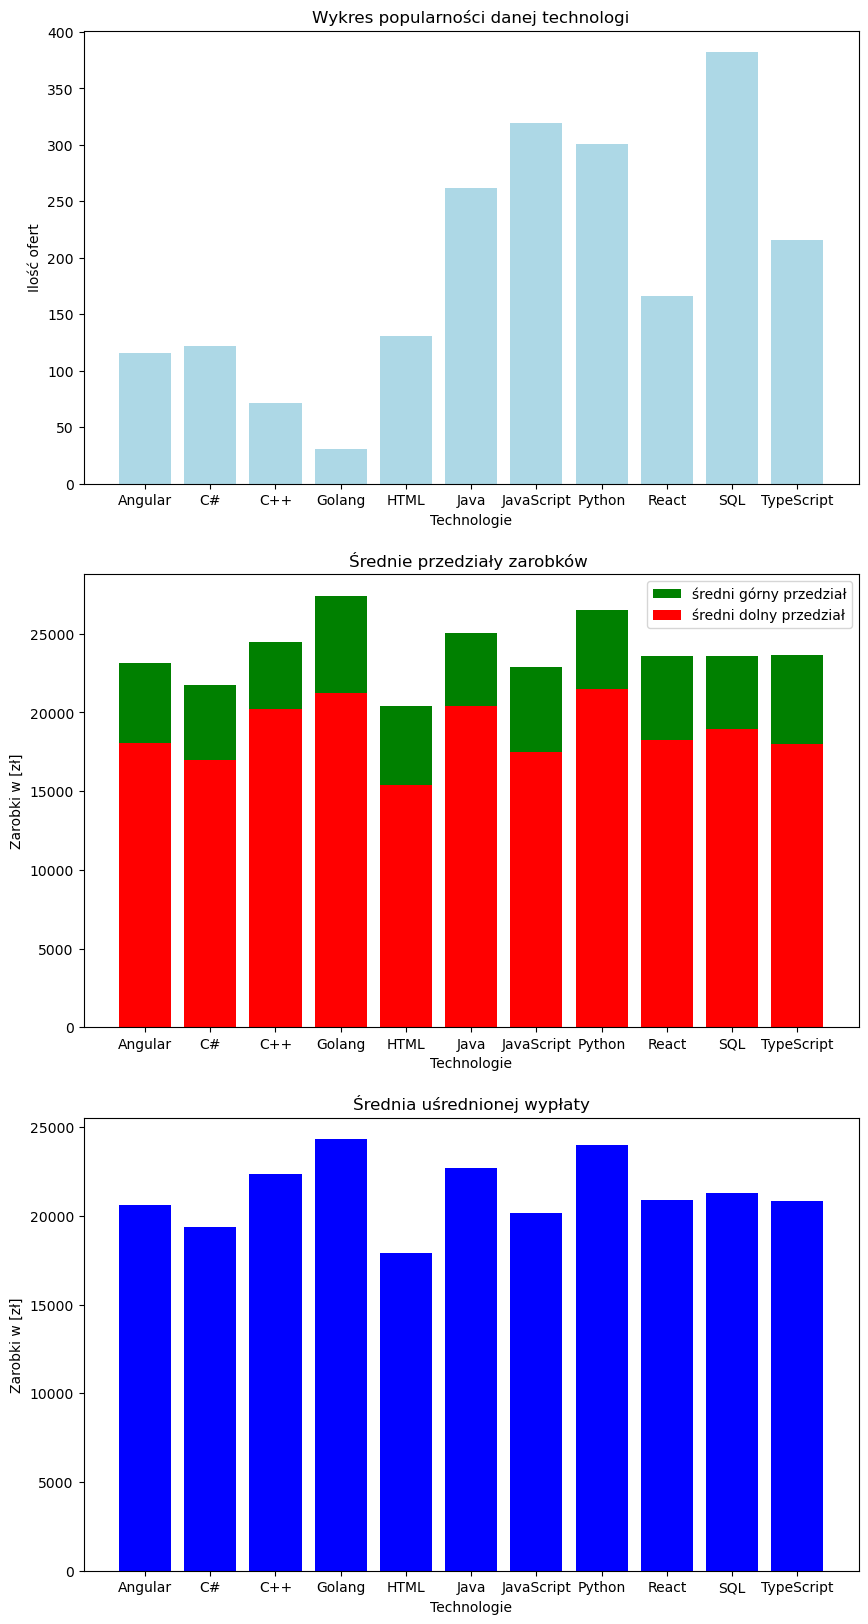

In [24]:
fig, ax = plt.subplots(3,1,figsize=(10,20))
ax[0].bar(popularnosc.index, popularnosc['maksymalna_pensja']['count'], color = 'lightblue')
ax[0].set_title('Wykres popularności danej technologi')
ax[0].set_xlabel('Technologie')
ax[0].set_ylabel('Ilość ofert')

ax[1].bar(popularnosc.index, popularnosc['maksymalna_pensja']['mean'], color = 'green', label='średni górny przedział')
ax[1].bar(popularnosc.index, popularnosc['minimalna_pensja']['mean'], color = 'red', label='średni dolny przedział')
ax[1].set_title('Średnie przedziały zarobków ')
ax[1].set_xlabel('Technologie')
ax[1].set_ylabel('Zarobki w [zł]')
ax[1].legend()

ax[2].bar(popularnosc.index, popularnosc['Średnia_wyplata']['mean'], color = 'blue')
ax[2].set_title('Średnia uśrednionej wypłaty')
ax[2].set_xlabel('Technologie')
ax[2].set_ylabel('Zarobki w [zł]')


In [18]:
#najwiekszą liczbą ofert pracy cieszy się SQL, inaczej kształtują się zarobki średnio najwiecej zarabia się używajac Golang i Python. Średnio najmniej natomiast używając HTML i C#

In [30]:
df['Doświadczenie'].value_counts()

Doświadczenie
senior     1020
mid         713
expert      248
junior      124
trainee      12
Name: count, dtype: int64

In [34]:
stats.kruskal(df[df['Doświadczenie']=='trainee']['Średnia_wyplata'],
             df[df['Doświadczenie']=='junior']['Średnia_wyplata'],
             df[df['Doświadczenie']=='mid']['Średnia_wyplata'],
             df[df['Doświadczenie']=='senior']['Średnia_wyplata'],
             df[df['Doświadczenie']=='expert']['Średnia_wyplata'])

KruskalResult(statistic=802.453028236926, pvalue=2.2594858206213297e-172)

In [ ]:
#grupy różnią się znacząco od siebie pod względem zarobków

In [38]:
rangi = []
for i in df['Doświadczenie']:
    if i == 'trainee':
        rangi.append(1)
    elif i == 'junior':
        rangi.append(2)
    elif i == 'mid':
        rangi.append(3)
    elif i == 'senior':
        rangi.append(4)
    elif i == 'expert':
        rangi.append(5)
df['Rangi'] = rangi
df

,Nazwa,Technologia,Doświadczenie,Lokalizacja,Wypłata,minimalna_pensja,maksymalna_pensja,Średnia_wyplata,Rangi
0,Junior Java Fullstack Developer,Java,junior,warszawa,8500–10500,8500,10500,9500.0,2
1,Junior Java Developer,Java,junior,warszawa,10080,10080,10080,10080.0,2
2,Jr. Java Trading Systems Developer (Core Java),Java,junior,warszawa,6500–9000,6500,9000,7750.0,2
3,Associate Java Software Engineer,Java,junior,krakow,7000–10000,7000,10000,8500.0,2
4,Jr. Java Trading Systems Developer (Core Java),Java,junior,krakow,6500–9000,6500,9000,7750.0,2
...,...,...,...,...,...,...,...,...,...
2112,Senior Full-stack Developer (Angular/C++),HTML,expert,krakow,18000–23000,18000,23000,20500.0,5
2113,Remote Lead Software Engineer (.NET),HTML,expert,gdansk,20000–25000,20000,25000,22500.0,5
2114,Remote Lead Software Engineer (.NET),HTML,expert,trojmiasto,20000–25000,20000,25000,22500.0,5
2115,Remote Lead Software Engineer (.NET),HTML,expert,bialystok,20000–25000,20000,25000,22500.0,5


In [40]:
df['Średnia_wyplata'].corr(df['Rangi'])

0.6376964187607705

In [ ]:
#dodatnia korelacja na poziomie 63% 

In [43]:
doswiadczenie = df.groupby('Doświadczenie')[['Średnia_wyplata','Rangi']].agg('mean').sort_values('Rangi')
doswiadczenie

,Średnia_wyplata,Rangi
Doświadczenie,,
trainee,5615.000000,1.0
junior,8505.677419,2.0
mid,18129.403927,3.0
senior,24155.802941,4.0
expert,26107.588710,5.0


Text(0, 0.5, 'Średnia wypłata')

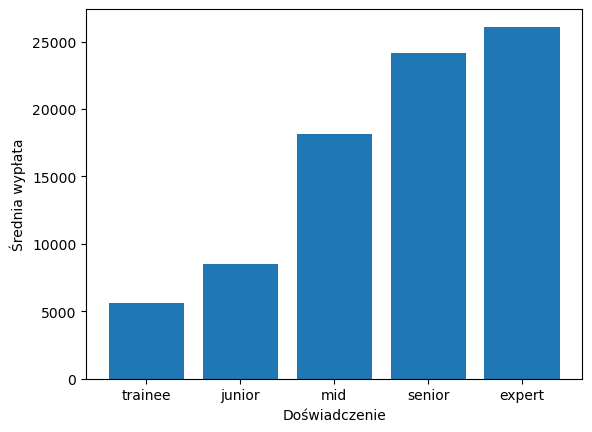

In [46]:
plt.bar(doswiadczenie.index, doswiadczenie['Średnia_wyplata'])
plt.xlabel('Doświadczenie')
plt.ylabel('Średnia wypłata')

In [ ]:
#wraz ze wzrostem doświadczenia rośnie średnia wypłata

In [54]:
Lokalizacja = df.groupby('Lokalizacja')['Średnia_wyplata'].agg('mean').sort_values()
Lokalizacja

Lokalizacja
katowice       17438.855856
slask          18053.429630
gliwice        19474.615385
krakow         20012.764706
szczecin       20302.363636
torun          20738.095238
czestochowa    21311.111111
bydgoszcz      21598.181818
wroclaw        21649.670040
trojmiasto     21865.037037
warszawa       22117.540470
gdansk         22329.093333
lodz           22530.432099
poznan         22826.255000
sopot          22977.846154
gdynia         23284.500000
rzeszow        23379.555556
bialystok      24195.789474
lublin         25849.318182
kielce         26250.000000
Name: Średnia_wyplata, dtype: float64

Text(0, 0.5, 'Średnia wypłata')

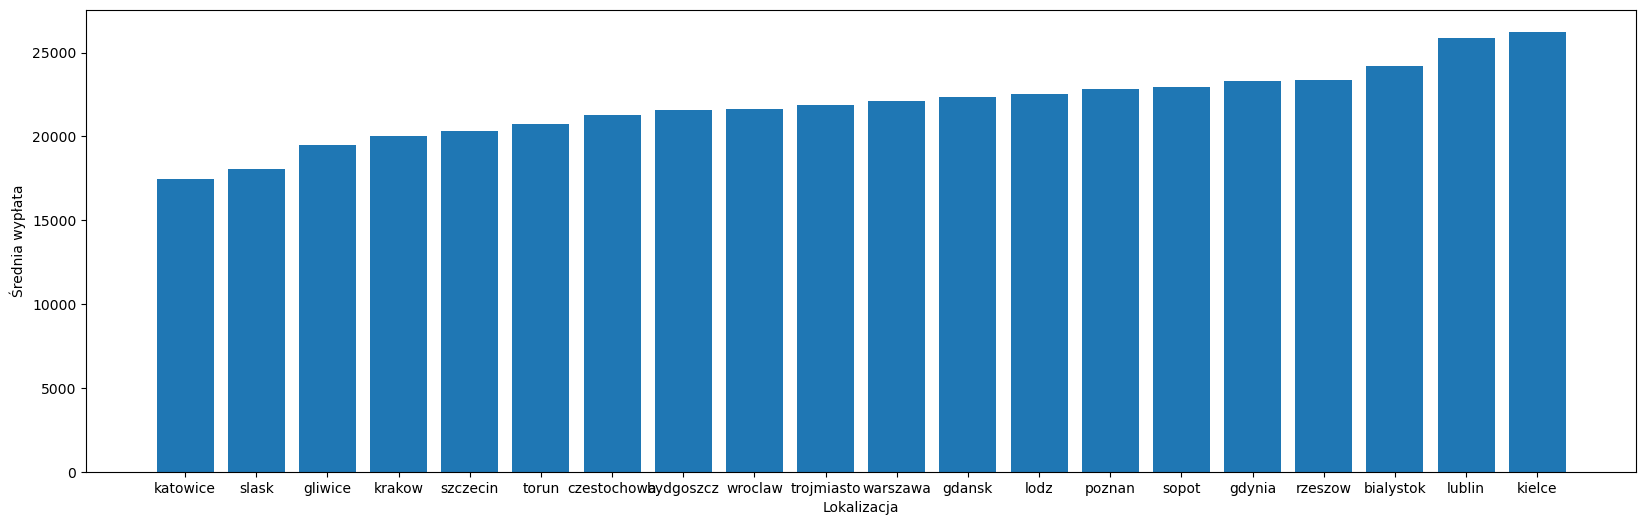

In [65]:
plt.figure(figsize = (20,6))
plt.bar(Lokalizacja.index, Lokalizacja)
plt.xlabel('Lokalizacja')
plt.ylabel('Średnia wypłata')

In [72]:
lokalizacja_technologia = df.groupby(['Lokalizacja','Technologia'])['Technologia'].agg('count').sort_values()
lokalizacja_technologia[lokalizacja_technologia > 30]

Lokalizacja  Technologia
trojmiasto   JavaScript     31
krakow       C#             31
wroclaw      Java           31
warszawa     Angular        32
trojmiasto   Python         33
krakow       React          35
warszawa     HTML           35
wroclaw      Python         37
warszawa     Python         38
krakow       TypeScript     40
wroclaw      JavaScript     40
             SQL            41
krakow       Python         41
             Java           41
gdansk       SQL            42
warszawa     React          42
krakow       SQL            43
             JavaScript     44
warszawa     TypeScript     44
trojmiasto   SQL            45
warszawa     JavaScript     46
             Java           47
             SQL            53
Name: Technologia, dtype: int64